In [142]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import pandas as pd
dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [143]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values
X.shape, y.shape

((20, 3), (20,))

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [2])],
    remainder = 'passthrough'
)
X_trans = ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
X_trans.shape, X_train.shape, X_test.shape

((20, 4), (16, 4), (4, 4))

In [146]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
y_pred = reg.predict(X_train)
y_pred, y_train

(array([57.22323961, 85.29111777, 44.89686182, 67.18859687, 23.30478412,
        20.80855613, 32.83130336, 67.18450992, 55.74398206, 50.09895946,
        76.99121064, 65.70933932, 30.33507537, -0.186027  , 64.75882175,
        61.8196688 ]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]))

In [148]:
y_pred = reg.predict(X_test)
y_pred, y_test

(array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204]),
 array([ 90,   8, 100,  38]))

In [149]:
reg.coef_, reg.intercept_

(array([-5.82712824, -1.04450647, 10.40419528, -1.64200104]),
 np.float64(5.3650067065447615))

In [150]:
X_train[0]

array([0.0, 0.0, 5.3, 2], dtype=object)

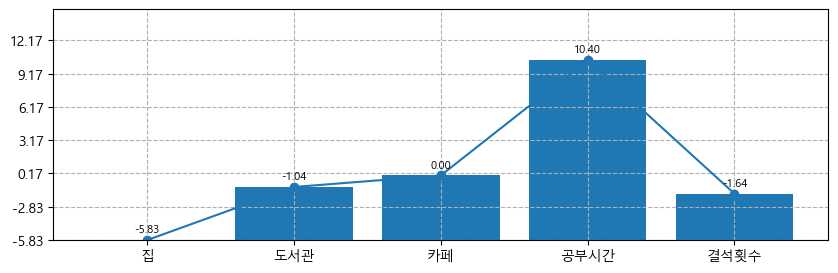

In [151]:
import numpy as np
x = ['집','도서관','카페','공부시간','결석횟수']
y=[reg.coef_[0], reg.coef_[1], 0, reg.coef_[2], reg.coef_[3]]
m = reg.coef_[0]
y1= y-m
plt.figure(figsize=(10, 3))
plt.plot(x, y, marker='o')
plt.grid(True, ls='--')
for idx in range(len(x)):
    plt.text(idx, y[idx]+0.7, f'{y[idx]:.2f}', size=8, ha='center')
plt.ylim(np.min(y), 15)
plt.yticks([y for y in np.arange(np.min(y), 15, 3)])
plt.bar(x, y1, bottom=m)
plt.show()

In [152]:
def model_multi():
    import pandas as pd
    dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
    X = dataset.iloc[:, :-1].values 
    y = dataset.iloc[:, -1].values
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder = 'passthrough')
    X_trans = ct.fit_transform(X)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg

In [153]:
model = model_multi()

In [154]:
#집에서 9시간 공부하고 결석 1번 했을 때 점수
pred = model.predict([[1.0, 0.0, 9.0, 1.0], [0.0, 1.0, 9.0, 1.0], [0.0, 0.0, 9.0, 1.0]])
pred

array([91.53363494, 96.3162567 , 97.36076317])

In [155]:
dict = {'집': [1,0], '도서관': [0, 1], '카페': [0, 0]}
place = '집'
p1 = dict.get(place)[0]
p2 = dict.get(place)[1]
hour = 9
absent = 1

model.predict([[p1, p2, hour, absent]])

array([91.53363494])

In [156]:
def predict(place, hour, absent):
    dict = {'집': [1,0], '도서관': [0, 1], '카페': [0, 0]}
    p1 = dict.get(place)[0]
    p2 = dict.get(place)[1]
    pred = model.predict([[p1, p2, hour, absent]])
    print(f'장소:{place}, 공부시간:{hour}시간, 결석횟수:{absent}번, 예상점수:{pred[0]:.2f}점')

In [157]:
predict('집', 9, 1)

장소:집, 공부시간:9시간, 결석횟수:1번, 예상점수:91.53점


In [158]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9623352565265527, 0.9859956178877446)

In [159]:
X_train, y_train

(array([[0.0, 0.0, 5.3, 2],
        [1.0, 0.0, 8.4, 1],
        [0.0, 1.0, 3.9, 0],
        [0.0, 0.0, 6.1, 1],
        [1.0, 0.0, 2.6, 2],
        [0.0, 0.0, 1.8, 2],
        [1.0, 0.0, 3.2, 0],
        [0.0, 1.0, 6.2, 1],
        [0.0, 0.0, 5.0, 1],
        [0.0, 1.0, 4.4, 0],
        [0.0, 0.0, 7.2, 2],
        [0.0, 0.0, 5.8, 0],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 0.5, 3],
        [1.0, 0.0, 6.9, 4],
        [0.0, 1.0, 6.0, 3]], dtype=object),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]))

In [160]:
X_train

array([[0.0, 0.0, 5.3, 2],
       [1.0, 0.0, 8.4, 1],
       [0.0, 1.0, 3.9, 0],
       [0.0, 0.0, 6.1, 1],
       [1.0, 0.0, 2.6, 2],
       [0.0, 0.0, 1.8, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 6.2, 1],
       [0.0, 0.0, 5.0, 1],
       [0.0, 1.0, 4.4, 0],
       [0.0, 0.0, 7.2, 2],
       [0.0, 0.0, 5.8, 0],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 0.5, 3],
       [1.0, 0.0, 6.9, 4],
       [0.0, 1.0, 6.0, 3]], dtype=object)

In [161]:
def place(x0, x1):
    places = {'10':'집', '01':'도서관', '00': '카페'}
    x0 = int(x0)
    x1 = int(x1)
    x = f'{x0}{x1}'
    return places[x]

place(0.0, 0.1)

'카페'

In [162]:
xticks = [f'장소:{place(x[0], x[1])}, 시간:{x[2]}시간, 결석:{x[3]}번' for x in X_train]
xticks

['장소:카페, 시간:5.3시간, 결석:2번',
 '장소:집, 시간:8.4시간, 결석:1번',
 '장소:도서관, 시간:3.9시간, 결석:0번',
 '장소:카페, 시간:6.1시간, 결석:1번',
 '장소:집, 시간:2.6시간, 결석:2번',
 '장소:카페, 시간:1.8시간, 결석:2번',
 '장소:집, 시간:3.2시간, 결석:0번',
 '장소:도서관, 시간:6.2시간, 결석:1번',
 '장소:카페, 시간:5.0시간, 결석:1번',
 '장소:도서관, 시간:4.4시간, 결석:0번',
 '장소:카페, 시간:7.2시간, 결석:2번',
 '장소:카페, 시간:5.8시간, 결석:0번',
 '장소:카페, 시간:2.4시간, 결석:0번',
 '장소:집, 시간:0.5시간, 결석:3번',
 '장소:집, 시간:6.9시간, 결석:4번',
 '장소:도서관, 시간:6.0시간, 결석:3번']

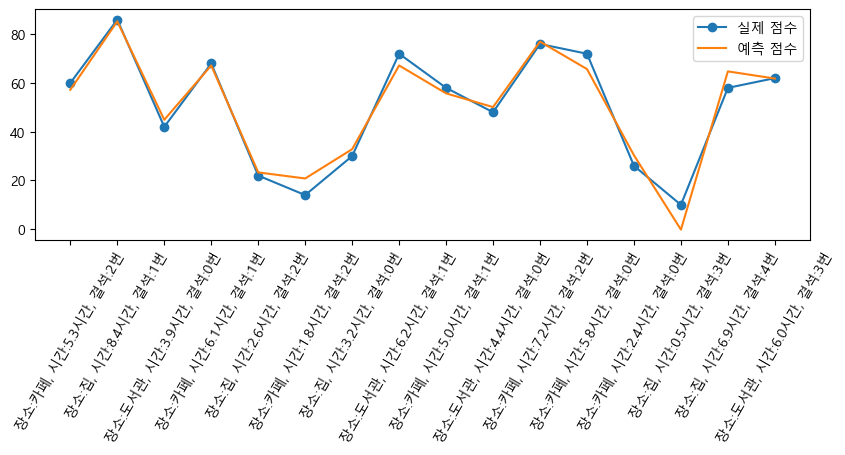

In [163]:
x = [idx for idx, x in enumerate(X_train)]
plt.figure(figsize=(10, 3))
plt.plot(x, y_train, marker='o', label='실제 점수')
plt.plot(x, reg.predict(X_train), label='예측 점수')
plt.xticks(x, xticks, rotation=60)
plt.legend()
plt.show()

In [164]:
df = pd.read_csv('data/다중선형회귀.csv')
df

,name,hour,absent,place
0,홍길동,10.0,3,Home
1,심청이,8.5,4,Library
2,강감찬,5.5,2,Cafe
3,성춘향,2.4,0,Cafe
4,김길동,2.6,2,Home
5,이순신,3.2,0,Home
6,조인성,9.5,0,Library
7,송혜교,6.9,0,Library
8,송중기,4.5,5,Home
9,김혜수,9.7,1,Cafe


In [165]:
X_df = df.iloc[:, 1:4].values

In [166]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder = 'passthrough')
X_trans = ct.fit_transform(X_df)

In [167]:
X_trans[:5]

array([[1.0, 0.0, 10.0, 3],
       [0.0, 1.0, 8.5, 4],
       [0.0, 0.0, 5.5, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2]], dtype=object)

In [168]:
y_pred =reg.predict(X_trans)
df_y = pd.DataFrame(y_pred)
df_y

,0
0,98.653828
1,86.188156
2,59.304079
3,30.335075
4,23.304784
5,32.831303
6,103.160355
7,76.109448
8,38.146752
9,104.643700


In [169]:
join = df.join(df_y)
join.rename(columns={0:'예측점수'})

,name,hour,absent,place,예측점수
0,홍길동,10.0,3,Home,98.653828
1,심청이,8.5,4,Library,86.188156
2,강감찬,5.5,2,Cafe,59.304079
3,성춘향,2.4,0,Cafe,30.335075
4,김길동,2.6,2,Home,23.304784
5,이순신,3.2,0,Home,32.831303
6,조인성,9.5,0,Library,103.160355
7,송혜교,6.9,0,Library,76.109448
8,송중기,4.5,5,Home,38.146752
9,김혜수,9.7,1,Cafe,104.643700
